In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import struc_dist.rna_utils as ru

META_PATH = "../data/sources/ArchiveII_with_prob_and_motiv.csv"

DIST_PATH = "../data/rnadist_f_all.h5"
dist200_PATH = "../data/rnadist_filtered200.h5"
dist400_PATH = "../data/rnadist_filtered400.h5"

SIM_PATH = "../data/seqsim_f_all.h5"
SIM200_PATH = "../data/seqsim_filtered200.h5"
SIM400_PATH = "../data/seqsim_filtered400.h5"

In [2]:
sim, meta_sim = ru.load_and_align(corr_path=SIM_PATH, meta_path=META_PATH)
sim200, meta_sim200 = ru.load_and_align(corr_path=SIM200_PATH, meta_path=META_PATH)
sim400, meta_sim400 = ru.load_and_align(corr_path=SIM400_PATH, meta_path=META_PATH)

dist, meta_dist = ru.load_and_align(corr_path=DIST_PATH, meta_path=META_PATH)
dist200, meta_dist200 = ru.load_and_align(corr_path=dist200_PATH, meta_path=META_PATH)
dist400, meta_dist400 = ru.load_and_align(corr_path=dist400_PATH, meta_path=META_PATH)

In [3]:
fams = meta_sim.fam.unique()

In [4]:
d200 = {}
d400 = {}
s200 = {}
s400 = {}
for fam in fams:
    d200[fam] = meta_dist200.query("fam == @fam")
    d400[fam] = meta_dist400.query("fam == @fam")
    s200[fam] = meta_sim200.query("fam == @fam")
    s400[fam] = meta_sim400.query("fam == @fam")

In [5]:
d200["telomerase"].index.shape

(35,)

In [6]:
d200[f"telomerase"].shape[0]

35

In [7]:
df = pd.DataFrame(columns=["fam", "interseccion_200", "interseccion_400"])
for fam in fams:
    l = []
    l.append(fam)
    print(f"fam: {fam}, dist200: {d200[fam].shape[0]}, dist400: {d400[fam].shape[0]}")
    if d200[fam].shape[0] < 200:
        size = d200[fam].shape[0]
    else:
        size = 200
    retain = 100 * d200[fam].index.isin(s200[fam].index).sum() / size
    print(f"{fam} 200: {retain:.2f}%")
    l.append(retain)
    if d400[fam].shape[0] < 400:
        size = d400[fam].shape[0]
    else:
        size = 400
    retain = 100 * d400[fam].index.isin(s400[fam].index).sum() / size
    print(f"{fam} 400: {retain:.2f}%")
    l.append(retain)

    df.loc[len(df)] = l
df = df.set_index("fam")

fam: 16s, dist200: 66, dist400: 66
16s 200: 100.00%
16s 400: 100.00%
fam: 23s, dist200: 15, dist400: 15
23s 200: 100.00%
23s 400: 100.00%
fam: 5s, dist200: 200, dist400: 400
5s 200: 41.00%
5s 400: 55.75%
fam: RNaseP, dist200: 200, dist400: 400
RNaseP 200: 79.00%
RNaseP 400: 96.00%
fam: grp1, dist200: 74, dist400: 74
grp1 200: 100.00%
grp1 400: 100.00%
fam: srp, dist200: 200, dist400: 400
srp 200: 67.00%
srp 400: 80.75%
fam: tRNA, dist200: 200, dist400: 400
tRNA 200: 63.00%
tRNA 400: 74.25%
fam: telomerase, dist200: 35, dist400: 35
telomerase 200: 100.00%
telomerase 400: 100.00%
fam: tmRNA, dist200: 200, dist400: 400
tmRNA 200: 91.50%
tmRNA 400: 94.50%


<Axes: title={'center': 'Intersección de secuencias por familia con filtros 200 y 400 por sim/dist'}, xlabel='Porcentaje de secuencias retenidas', ylabel='Familia'>

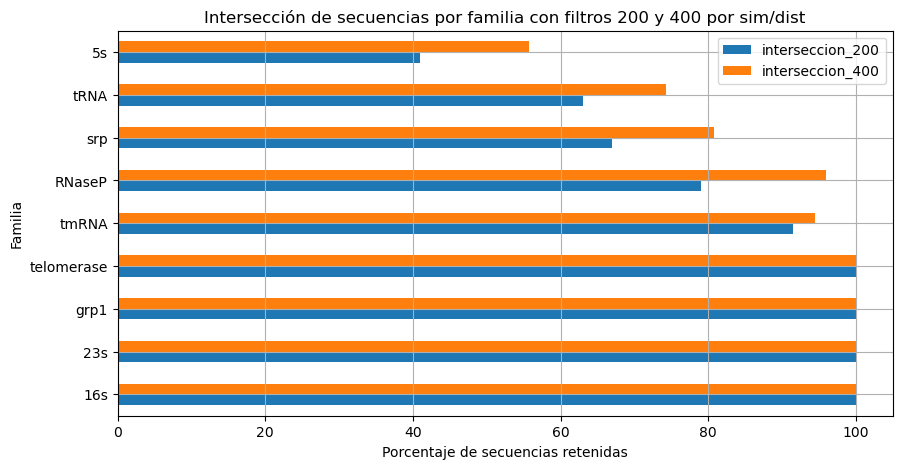

In [8]:
df.sort_values(by="interseccion_200", ascending=False).plot(
    kind="barh",
    figsize=(10, 5),
    grid=True,
    title="Intersección de secuencias por familia con filtros 200 y 400 por sim/dist",
    xlabel="Porcentaje de secuencias retenidas",
    ylabel="Familia",
)

In [9]:
df

,interseccion_200,interseccion_400
fam,,
16s,100.0,100.00
23s,100.0,100.00
5s,41.0,55.75
RNaseP,79.0,96.00
grp1,100.0,100.00
srp,67.0,80.75
tRNA,63.0,74.25
telomerase,100.0,100.00
tmRNA,91.5,94.50


In [10]:
df = pd.DataFrame(columns=["fam", "interseccion_200", "interseccion_400"])
for fam in fams:
    l = []
    l.append(fam)
    print(f"fam: {fam}, dist200: {d200[fam].shape[0]}, dist400: {d400[fam].shape[0]}")
    if d200[fam].shape[0] < 200:
        size = d200[fam].shape[0]
    else:
        size = 200
    retain = d200[fam].index.isin(s200[fam].index).sum()
    print(f"{fam} 200: {retain:.2f}%")
    l.append(retain)
    if d400[fam].shape[0] < 400:
        size = d400[fam].shape[0]
    else:
        size = 400
    retain = d400[fam].index.isin(s400[fam].index).sum()
    print(f"{fam} 400: {retain:.2f}%")
    l.append(retain)

    df.loc[len(df)] = l
df = df.set_index("fam")
df

fam: 16s, dist200: 66, dist400: 66
16s 200: 66.00%
16s 400: 66.00%
fam: 23s, dist200: 15, dist400: 15
23s 200: 15.00%
23s 400: 15.00%
fam: 5s, dist200: 200, dist400: 400
5s 200: 82.00%
5s 400: 223.00%
fam: RNaseP, dist200: 200, dist400: 400
RNaseP 200: 158.00%
RNaseP 400: 384.00%
fam: grp1, dist200: 74, dist400: 74
grp1 200: 74.00%
grp1 400: 74.00%
fam: srp, dist200: 200, dist400: 400
srp 200: 134.00%
srp 400: 323.00%
fam: tRNA, dist200: 200, dist400: 400
tRNA 200: 126.00%
tRNA 400: 297.00%
fam: telomerase, dist200: 35, dist400: 35
telomerase 200: 35.00%
telomerase 400: 35.00%
fam: tmRNA, dist200: 200, dist400: 400
tmRNA 200: 183.00%
tmRNA 400: 378.00%


,interseccion_200,interseccion_400
fam,,
16s,66,66
23s,15,15
5s,82,223
RNaseP,158,384
grp1,74,74
srp,134,323
tRNA,126,297
telomerase,35,35
tmRNA,183,378


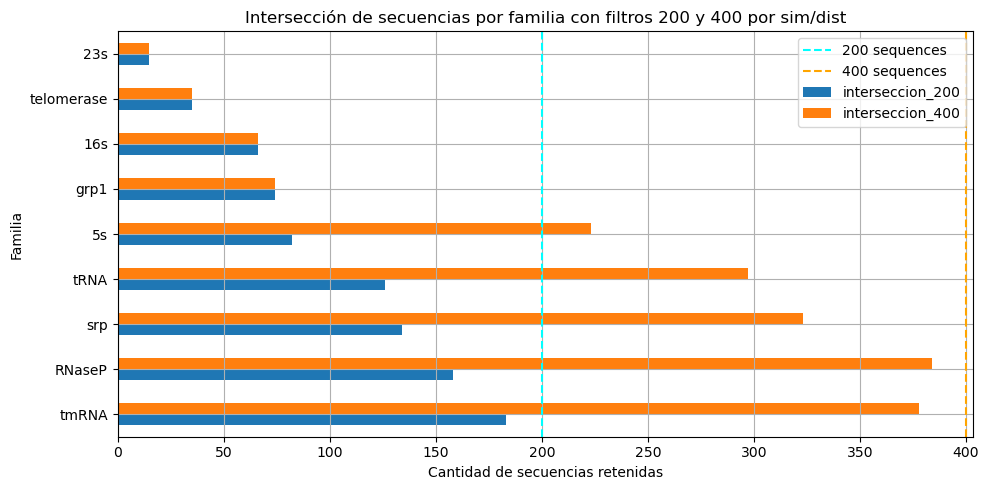

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
df.sort_values(by="interseccion_200", ascending=False).plot(
    kind="barh",
    figsize=(10, 5),
    grid=True,
    title="Intersección de secuencias por familia con filtros 200 y 400 por sim/dist",
    xlabel="Cantidad de secuencias retenidas",
    ylabel="Familia",
    ax=ax,
)
ax.axvline(x=200, color="cyan", linestyle="--", label="200 sequences")
ax.axvline(x=400, color="orange", linestyle="--", label="400 sequences")
ax.legend()
plt.tight_layout()
plt.show()

In [12]:
d200[fam][["sequence", "structure", "len", "fam"]]
# ordenar por promedio de fila
intra = dist200.loc[d200[fam].index, d200[fam].index]
avg = intra.mean(axis=0)
ids = avg.sort_values(ascending=True).index
intra_means = intra.loc[ids, ids]
display(intra_means)

id,tmRNA_Geob.stea._TRW-1422_1-352,tmRNA_Stre.uber._TRW-218495_1-350,tmRNA_Paen.larv._TRW-1464_1-367,tmRNA_Pedi.pent._CP000422_1-369,tmRNA_Ente.faec._TRW-1352_1-367,tmRNA_Lact.case._CP000423_1-364,tmRNA_Stre.ther._CP000419_1-350,tmRNA_Xyle.fast._TRW-155920_1-355,tmRNA_Leuc.mese._TRW-1245_1-358,tmRNA_Lact.plan._AL935259_1-372,...,tmRNA_Myco.gall._AE015450_1-408,tmRNA_Trem.prin._AF481102_1-264,tmRNA_Thal.weis._AF049491_1-348,tmRNA_Myco.hyop._TRW-295358_1-424,tmRNA_Carn.malt._AF275938_1-366,tmRNA_Stre.scab._TRW-1883_1-402,tmRNA_Myco.Bxz1._AY129337_1-437,tmRNA_Odon.sine._Z67753_1-368,tmRNA_Grac.tenu._AY673996_1-396,tmRNA_Jako.libe._TRW-143017_1-102
id,,,,,,,,,,,,,,,,,,,,,
tmRNA_Geob.stea._TRW-1422_1-352,0.000000,0.119318,0.144414,0.143631,0.177112,0.148352,0.159091,0.166197,0.139665,0.139785,...,0.431373,0.392045,0.431818,0.429245,0.420765,0.467662,0.459954,0.478261,0.585859,0.710227
tmRNA_Stre.uber._TRW-218495_1-350,0.119318,0.000000,0.122616,0.159892,0.177112,0.159341,0.137143,0.205634,0.134078,0.155914,...,0.387255,0.411429,0.462857,0.424528,0.426230,0.452736,0.478261,0.489130,0.595960,0.708571
tmRNA_Paen.larv._TRW-1464_1-367,0.144414,0.122616,0.000000,0.130081,0.179837,0.128065,0.166213,0.201635,0.128065,0.163978,...,0.414216,0.422343,0.422343,0.436321,0.395095,0.475124,0.457666,0.459239,0.603535,0.722071
tmRNA_Pedi.pent._CP000422_1-369,0.143631,0.159892,0.130081,0.000000,0.151762,0.132791,0.159892,0.195122,0.154472,0.115591,...,0.404412,0.409214,0.365854,0.412736,0.333333,0.465174,0.448513,0.430894,0.542929,0.723577
tmRNA_Ente.faec._TRW-1352_1-367,0.177112,0.177112,0.179837,0.151762,0.000000,0.209809,0.166213,0.196185,0.182561,0.185484,...,0.463235,0.405995,0.465940,0.455189,0.373297,0.475124,0.517162,0.524457,0.613636,0.722071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tmRNA_Stre.scab._TRW-1883_1-402,0.467662,0.452736,0.475124,0.465174,0.475124,0.482587,0.467662,0.430348,0.482587,0.398010,...,0.495098,0.552239,0.462687,0.528302,0.452736,0.000000,0.446224,0.527363,0.577114,0.800995
tmRNA_Myco.Bxz1._AY129337_1-437,0.459954,0.478261,0.457666,0.448513,0.517162,0.450801,0.491991,0.475973,0.505721,0.414188,...,0.423341,0.537757,0.276888,0.391304,0.469108,0.446224,0.000000,0.272311,0.286041,0.766590
tmRNA_Odon.sine._Z67753_1-368,0.478261,0.489130,0.459239,0.430894,0.524457,0.472826,0.538043,0.508152,0.483696,0.462366,...,0.294118,0.478261,0.125000,0.235849,0.543478,0.527363,0.272311,0.000000,0.227273,0.739130


Text(0.5, 1.0, 'Distance matrix for tmRNA family (200 sequences)')

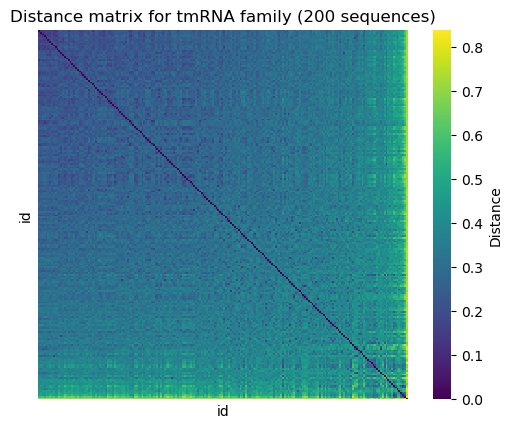

In [13]:
g = sns.heatmap(
    intra_means,
    cmap="viridis",
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "Distance"},
    square=True,
)
# remove x and y ticks
g.set_xticks([])
g.set_yticks([])
g.set_title(f"Distance matrix for {fam} family (200 sequences)", fontsize=12)

In [14]:


def order_matrix(mat: pd.DataFrame, method="mean"):
    """
    Re-ordena filas/columnas para visualización.
    method = 'mean'  → por distancia media (centrales primero)
           = 'cluster' → clustering jerárquico (average linkage)
    """
    if method == "cluster":
        cond = squareform(mat.values, checks=False)
        Z = linkage(cond, method="average")
        order = leaves_list(Z)
        ids = mat.index[order]
        return mat.loc[ids, ids]

    # default: mean distance
    avg = mat.mean(axis=0)
    ids = avg.sort_values().index
    return mat.loc[ids, ids]

In [23]:
sim.shape

(3864, 3864)

In [20]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, leaves_list, dendrogram, cut_tree

intra = dist200.loc[d200[fam].index, d200[fam].index]
# cond = squareform(intra.values, checks=False)
Z = linkage(sim, method="average", metric="chebyshev")
# S = cut_tree(Z, n_clusters=200)
order = leaves_list(Z)
print(order)
ids = sim.index[order]
intra_cl = sim.loc[ids, ids]

[  12   11   36 ...   47   24 1583]


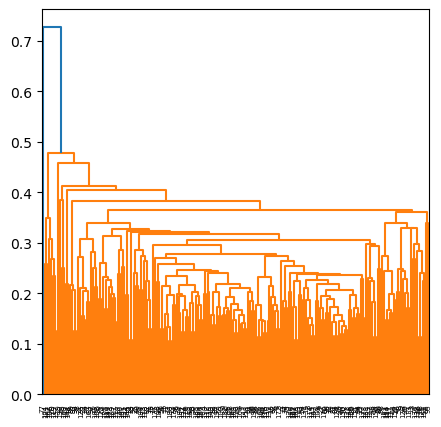

In [16]:
fig = plt.figure(figsize=(5, 5))
dn = dendrogram(Z)
plt.show()

Text(0.5, 1.0, 'Distance matrix for tmRNA family (200 sequences)')

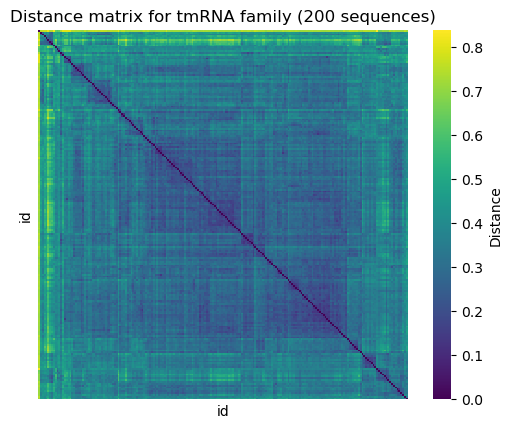

In [17]:
g = sns.heatmap(
    intra_cl,
    cmap="viridis",
    annot=False,
    fmt=".2f",
    cbar_kws={"label": "Distance"},
    square=True,
)
# remove x and y ticks
g.set_xticks([])
g.set_yticks([])
g.set_title(f"Distance matrix for {fam} family (200 sequences)", fontsize=12)